In [1]:
import ast
import json
import influxdb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cookbook import Cookbook
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_palette('husl', 2)

In [3]:
mbd = Cookbook('../example/mary-beth-doyle.jsonld')

In [4]:
mbd.run()

In [5]:
sycamore = Cookbook('../example/sycamore-sycamore_school.jsonld')

In [6]:
sycamore.run()

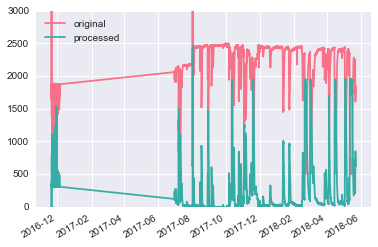

In [13]:
mbd.maxbotix_depth_old.plot(label='original')
mbd.maxbotix_depth.plot(label='processed')
plt.ylim(0, 3000)
plt.legend()

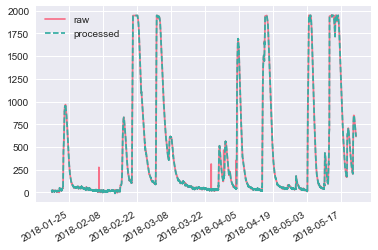

In [14]:
(2451.1 - mbd.maxbotix_depth_old.iloc[-10000:]).plot(label='raw')
mbd.maxbotix_depth.iloc[-10000:].plot(label='processed', linestyle='--')
plt.legend()

In [15]:
annotation = mbd.annotations['maxbotix_depth']['spikes']

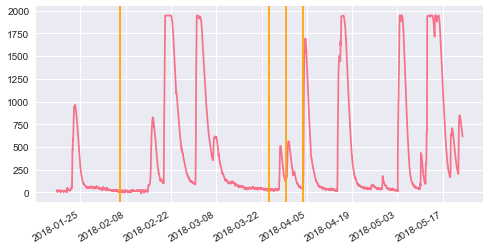

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

mbd.maxbotix_depth.iloc[-10000:].plot(ax=ax)

annotation_where = annotation['where'][-10000:]

for timestamp in annotation_where[annotation_where].index:
    ax.axvline(timestamp, color='orange')